# Artificial Training Dataset Maker

## Used to create truly bimodal output to test multimodality of colorization model

This program creates a pair of red and blue circles. 
Each pair has a random location and size. 
The blue and red color values have the same lightness value in LAB.

In [27]:
import numpy as np
import random
import turtle
import matplotlib.pyplot as plt
from tqdm import tnrange
import cv2
import math

# Prove colors have equal L value
## Also find midpoint between colors

In [16]:
blue_ab = np.array([162, 58]) 
red_ab = np.array([205, 178])
scaled_blue = blue_ab / 128 - 1
scaled_red = red_ab / 128 - 1

avg = (blue_ab + red_ab) / 2
scaled_avg = avg / 128 - 1

In [17]:
print(blue_ab)
print(scaled_blue)

[162  58]
[ 0.265625 -0.546875]


In [18]:
print(red_ab)
print(scaled_red)

[205 178]
[0.6015625 0.390625 ]


In [20]:
print(avg)
print(avg / 128 - 1)
print(scaled_avg)

[183.5 118. ]
[ 0.43359375 -0.078125  ]
[ 0.43359375 -0.078125  ]


In [33]:
def get_sqrt(dist):
    return math.sqrt(np.sum(dist * dist))

In [35]:
get_sqrt(scaled_red - scaled_blue)

0.9958716051310279

In [39]:
get_sqrt(scaled_avg - scaled_blue)

0.49793580256551395

In [40]:
get_sqrt(scaled_avg - scaled_red)

0.49793580256551395

r: 177 g: 76 b: 152
l: 122 a: 178 b: 106


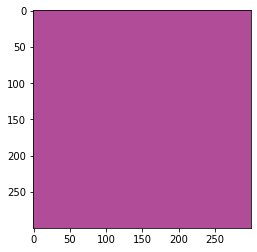

In [2]:
# Old colors not quite equal
# blue = (85/255, 100/255, 255/255)
# red = (244/255, 0, 0)

# New colors confirmed equal
blue = (100/255, 118/255, 255/255)
red = (255 / 255, 35/255, 50/255)

avg1 = (np.zeros((300,300,3)) + (np.array(blue) + np.array(red)) / 2)
plt.imshow(avg1)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 77 g: 178 b: 102
l: 167 a: 82 b: 158


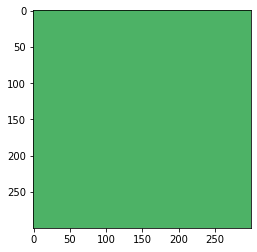

In [3]:
avg2 = 1-avg1
plt.imshow(avg2)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

In [3]:
y_pred = np.zeros((8,300,300,2))
y_pred.shape
y_pred[0] = 100

In [4]:
image_difference = np.mean(np.square(y_pred[::2] - y_pred[1::2]), axis = (1, 2, 3))
image_difference = np.repeat(image_difference, 2, axis=0)
image_difference

array([10000., 10000.,     0.,     0.,     0.,     0.,     0.,     0.])

# Generate Circles

In [5]:
def make_random_circle_pairs(num_pairs, save_dir):

    for i in tnrange(num_pairs, desc="Generating Circle Pairs"):

        fig, ax = plt.subplots()
        fig.set_size_inches(1, 1)
        

        radius = (random.random() + .5) / 2
        x, y = random.random(), random.random()
        
    
        
        r = plt.Circle((x, y), radius, color=red)
        ax.add_artist(r)
        plt.axis("off")
        plt.savefig(save_dir + str(i) + 'r.jpeg', dpi=256)

        plt.close()


        fig, ax = plt.subplots()
        fig.set_size_inches(1, 1)


        b = plt.Circle((x, y), radius, color=blue)
        ax.add_artist(b)
        plt.axis("off")


        plt.savefig(save_dir + str(i) + 'b.jpeg', dpi=256)
        plt.close()

In [7]:
# Training set
make_random_circle_pairs(100, "circle_pairs_equal_l_red_blue/train/subdir/")

In [8]:
# Testing set
make_random_circle_pairs(20, "circle_pairs_equal_l_red_blue/test/")

# Double-check circles created correctly

BGR: [100 118 255]
LAB: [140 162  58]


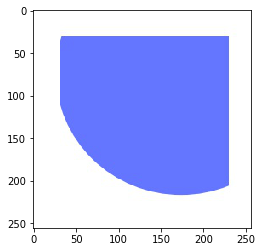

In [19]:
blue_cir = cv2.imread("circle_pairs_equal_l_red_blue/train/subdir/1b.jpeg")
blue_cir = cv2.cvtColor(blue_cir, cv2.COLOR_BGR2RGB)
plt.imshow(blue_cir)
print("BGR:", blue_cir[100,100])
blue_lab = cv2.cvtColor(blue_cir, cv2.COLOR_RGB2LAB)
print("LAB:", blue_lab[100,100])

BGR: [255  34  49]
LAB: [140 205 178]


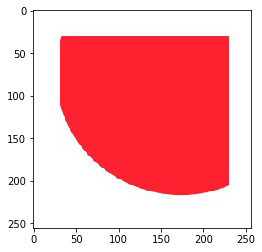

In [22]:
red_cir = cv2.imread("circle_pairs_equal_l_red_blue/train/subdir/1r.jpeg")
red_cir = cv2.cvtColor(red_cir, cv2.COLOR_BGR2RGB)
plt.imshow(red_cir)
print("BGR:", red_cir[100,100])
red_lab = cv2.cvtColor(red_cir, cv2.COLOR_RGB2LAB)
print("LAB:", red_lab[100,100])